In [36]:
import csv
import matplotlib.pyplot as plt

# si el dato es un string vacio, retorna 0, si no, intenta convertirlo a float, si falla, retorna el string
def tipo_dato(dato):
  if dato == '':
    return 0
  try:
    return float(dato)
  except ValueError:
    return dato

# se lee el csv y se retorna un diccionario con los datos
def leer_csv():
  with open('./credit_risk_dataset.csv') as f:
    reader = csv.DictReader(f)
    data = {row: [] for row in reader.fieldnames}
    for row in reader:
      for key in row:
        data[key].append(tipo_dato(row[key]))
  return data

# cuenta la cantidad de veces que aparece cada elemento de un array en el array
def frecuencia(arr):
  dic = {}
  for i in arr:
    if i in dic:
      dic[i] += 1
    else:
      dic[i] = 1
  return tuple(dic.items())

# dado un array de numeros, discretizar dicho array en n intervalos
def discretizar(arr, n):
  maximo = max(arr)
  minimo = min(arr)
  rango = maximo - minimo
  intervalo = rango / n
  intervalos = [[(round(minimo + i * intervalo, 3), round(minimo + (i+1) * intervalo, 3)), 0] for i in range(n)]
  for num in arr:
    for i in range(n-1, -1, -1):
      if intervalos[i][0][0] <= num:
        intervalos[i][1] += 1
        break
  return intervalos

#
def percentil_frecuencia(arr, p):
  ordenado = sorted(arr, key=lambda x: x[1])
  if p == 1:
    return ordenado[-1][0]
  pos = len(arr) * p
  return ordenado[int(pos)][0]
  
# devuelve el percentil de un dato en un array discretizado
def percentil_discretizacion(arr, p):
  N = sum(f for _, f in arr)
  w = round(arr[0][0][1] - arr[0][0][0], 3)
  F = F_a = 0 
  for (i, _), f in arr:
    F_a = F
    F += f
    if F >= N * p:
      return i + w * (N * p - F_a) / f


def graficar(data, intervalo, label):
  x = range(len(data["label"]))
  fig, ax = plt.subplots()
  freq = ax.bar(x, data["f"], intervalo, label=f'f_{label}')

  ax.set_xlabel(label)
  ax.set_ylabel('Frecuencia')
  ax.set_title(f'Datos {label}')
  ax.set_xticks([p for p in x])
  ax.set_xticklabels(data["label"], rotation=15)
  ax.legend()

  # plt.savefig(f'Datos_{label}.png')  # Guardar imagen
  plt.show()


dataset = leer_csv()

person_age = discretizar(dataset['person_age'], 5)
person_income = discretizar(dataset['person_income'], 5)
person_home_ownership = frecuencia(dataset['person_home_ownership'])
person_emp_length = discretizar(dataset['person_emp_length'], 5)
loan_intent = frecuencia(dataset['loan_intent'])
loan_grade = frecuencia(dataset['loan_grade'])
loan_amnt = discretizar(dataset['loan_amnt'], 5)
loan_int_rate = discretizar(dataset['loan_int_rate'], 5)
loan_status = frecuencia(dataset['loan_status'])
loan_percent_income = discretizar(dataset['loan_percent_income'], 5)
cb_person_default_on_file = frecuencia(dataset['cb_person_default_on_file'])
cb_person_cred_hist_length = discretizar(dataset['cb_person_cred_hist_length'], 5)

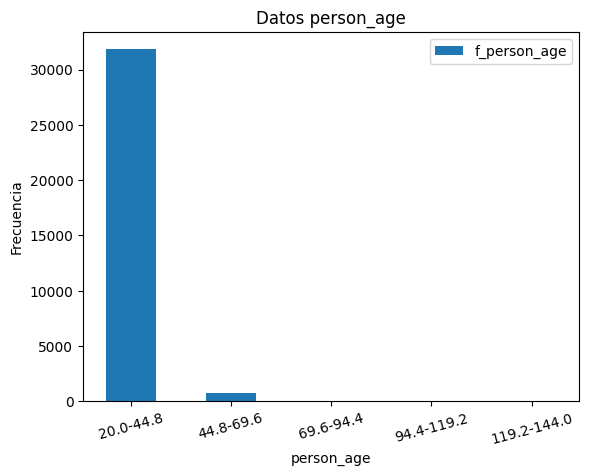

In [37]:
graficar({"label": [f'{i[0]}-{i[1]}' for i, _ in person_age], "f": [f for _, f in person_age]}, 0.5, "person_age")

El grafico representa rangos de edades de las personas y la cantidad de datos que se encuentran en ese rango

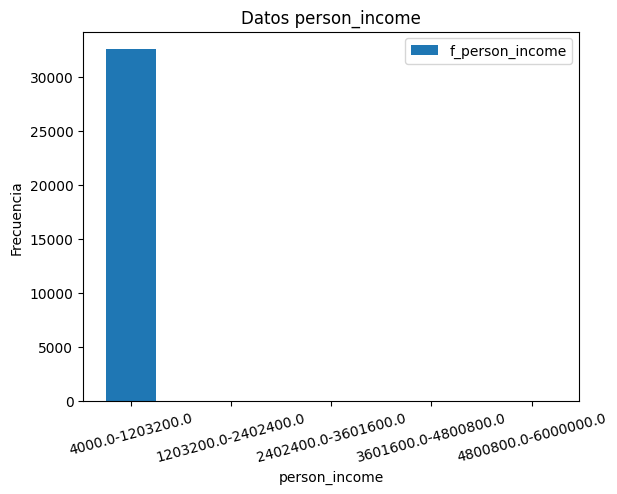

In [38]:
graficar({"label": [f'{i[0]}-{i[1]}' for i, _ in person_income], "f": [f for _, f in person_income]}, 0.5, "person_income")

El grafico representa los rangos de las ganancias anuales de las personas y la cantidad de datos que se encuentran en ese rango

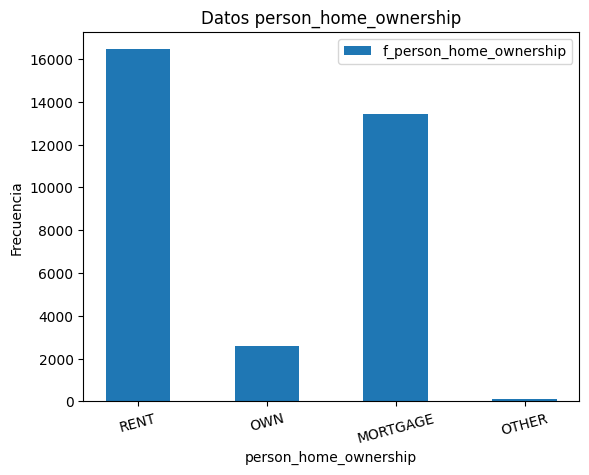

In [39]:
graficar({"label": [i for i, _ in person_home_ownership], "f": [f for _, f in person_home_ownership]}, 0.5, "person_home_ownership")

El grafico representa la frecuencia con la que se presenta el estado de una persona en relacion con la propiedad su hogar

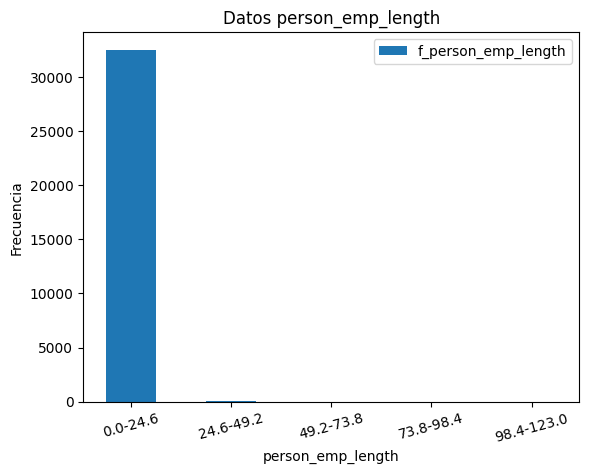

In [40]:
graficar({"label": [f'{i[0]}-{i[1]}' for i, _ in person_emp_length], "f": [f for _, f in person_emp_length]}, 0.5, "person_emp_length")

El grafico representa los rangos de tiempo que una persona lleva trabajando y la cantidad de datos que se encuentran en ese rango

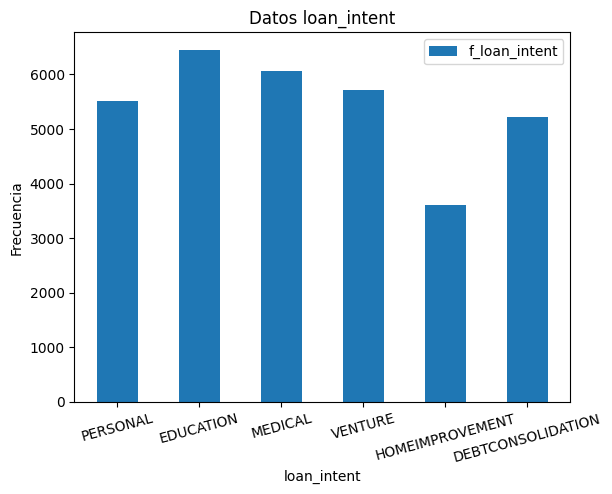

In [41]:
graficar({"label": [i for i, _ in loan_intent], "f": [f for _, f in loan_intent]}, 0.5, "loan_intent")

El grafico representa la frecuencia con la que se presenta el estado de una persona en relacion con el motivo del prestamo

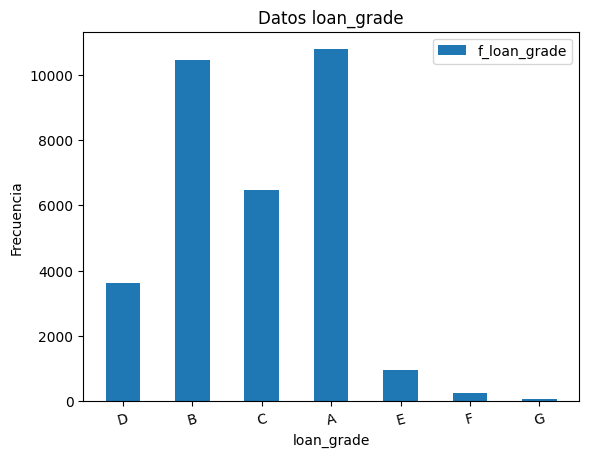

In [42]:
graficar({"label": [i for i, _ in loan_grade], "f": [f for _, f in loan_grade]}, 0.5, "loan_grade")

El grafico representa la frecuencia con la que se presenta el estado de una persona en relacion con la nota del prestamo

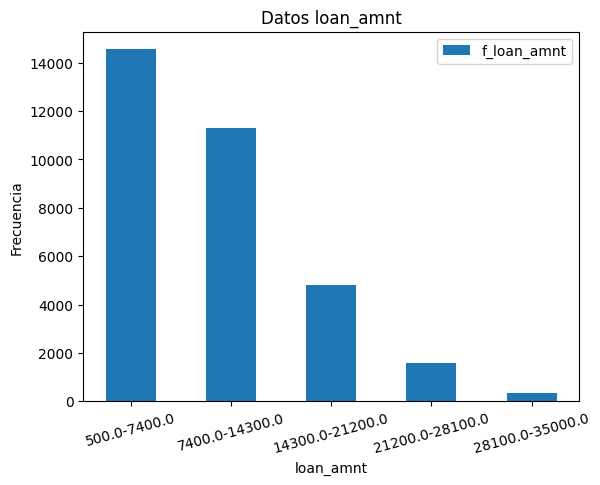

In [43]:
graficar({"label": [f'{i[0]}-{i[1]}' for i, _ in loan_amnt], "f": [f for _, f in loan_amnt]}, 0.5, "loan_amnt")

El grafico representa los rangos del monto de prestamo de las personas y la cantidad de datos que se encuentran en ese rango

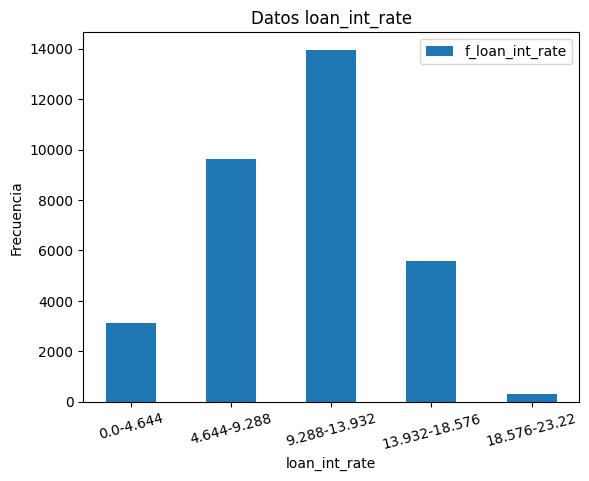

In [44]:
graficar({"label": [f'{i[0]}-{i[1]}' for i, _ in loan_int_rate], "f": [f for _, f in loan_int_rate]}, 0.5, "loan_int_rate")

El grafico representa los rangos de las tasas de interes de las personas y la cantidad de datos que se encuentran en ese rango

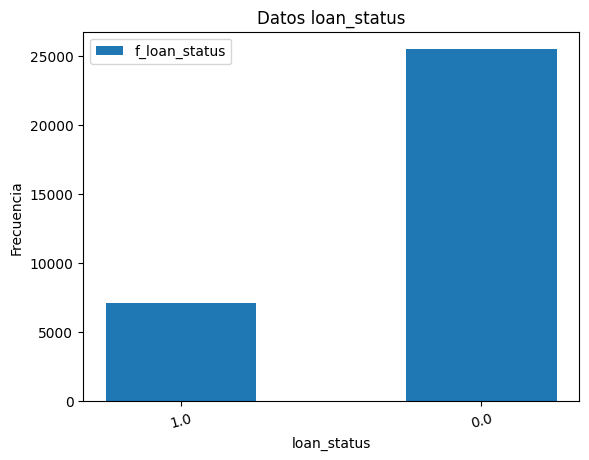

In [45]:
graficar({"label": [i for i, _ in loan_status], "f": [f for _, f in loan_status]}, 0.5, "loan_status")

El grafico representa la frecuencia con la que se presenta el estado de una persona en relacion con el pago de su prestamo, 0 significa que esta cumpliendo con los pagos y 1 que no cumple con los pagos

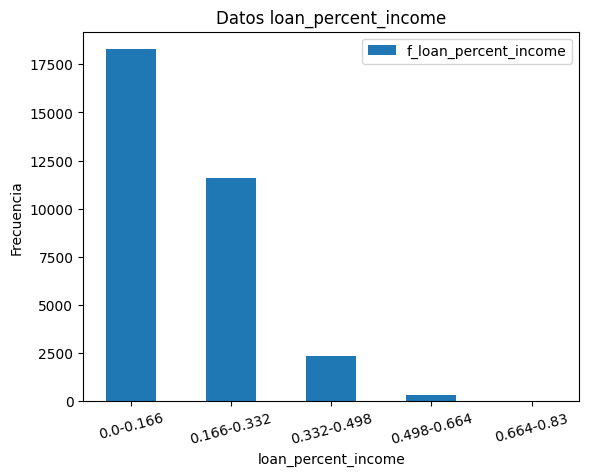

In [46]:
graficar({"label": [f'{i[0]}-{i[1]}' for i, _ in loan_percent_income], "f": [f for _, f in loan_percent_income]}, 0.5, "loan_percent_income")

El grafico representa los rangos de porcentaje de ingreso de las personas y la cantidad de datos que se encuentran en ese rango

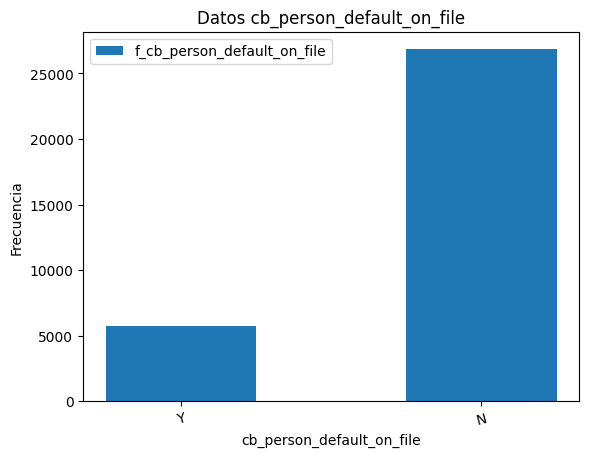

In [47]:
graficar({"label": [i for i, _ in cb_person_default_on_file], "f": [f for _, f in cb_person_default_on_file]}, 0.5, "cb_person_default_on_file")

El grafico representa la frecuencia con la que se presenta el estado de una persona en relacion con su historial de imcumplimiento de prestamos

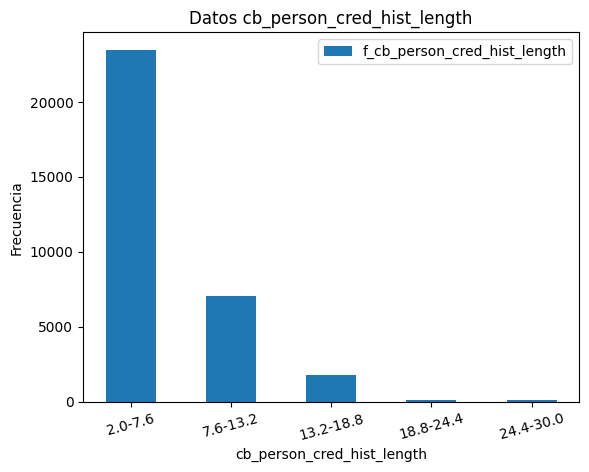

In [48]:
graficar({"label": [f'{i[0]}-{i[1]}' for i, _ in cb_person_cred_hist_length], "f": [f for _, f in cb_person_cred_hist_length]}, 0.5, "cb_person_cred_hist_length")

El grafico representa los rangos del largo del historial crediticio de las personas y la cantidad de datos que se encuentran en ese rango